<a href="https://colab.research.google.com/github/Trip1ewhy/Duke_xAI_Wayne/blob/main/Assignment_06_Wayne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AIPI 590 - XAI | Assignment #06
### Explainable Techniques II

Instructions

For a model and dataset of your choice, produce PDP, ICE, and ALE plots. Exploratory analysis of your dataset should be performed to determine the amount of correlation between features.  

Provide a comprehensive explanation of your plots. Discuss any interesting findings that are shown in the plots. Discuss any differences you see in the PDP and ALE plots. Discuss your exploratory findings around correlation between features and the impact this has (if any) on your results.


### Wayne Yang
#### https://github.com/Trip1ewhy/Duke_xAI_Wayne/blob/main/Assignment_06_Wayne.ipynb

[![Open In Collab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1huwAE9uQpzad5svBl7wkWMvOOztjwFJH)


## Set up ##


In [ ]:
!rm -r ./sample_data

In [ ]:
# Please use this to connect your GitHub repository to your Google Colab notebook
# Connects to any needed files from GitHub and Google Drive
import os

# Remove Colab default sample_data


# Clone GitHub files to colab workspace
repo_name = "Duke_xAI_Wayne" # Change to your repo name
git_path = 'https://github.com/Trip1ewhy/Duke_xAI_Wayne.git' #Change to your path
!git clone "{git_path}"

# Install dependencies from requirements.txt file
#!pip install -r "{os.path.join(repo_name,'requirements.txt')}" #Add if using requirements.txt

# Change working directory to location of notebook
notebook_dir = 'Assignment #05_Wayne'
path_to_notebook = os.path.join(repo_name,notebook_dir)
%cd "{path_to_notebook}"
%ls

Cloning into 'Duke_xAI_Wayne'...
remote: Enumerating objects: 143, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 143 (delta 5), reused 4 (delta 4), pack-reused 135 (from 1)
Receiving objects: 100% (143/143), 37.16 MiB | 17.08 MiB/s, done.
Resolving deltas: 100% (42/42), done.
[Errno 2] No such file or directory: 'Duke_xAI_Wayne/Assignment #05_Wayne'
/content
Duke_xAI_Wayne/


## Dataset and Logistic Regression model ##
The following code is based on my own third assignment.

In [ ]:
#pip install alibi

In [ ]:
# Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import LabelEncoder
from sklearn.inspection import PartialDependenceDisplay
#from alibi.explainers import ALE


In [ ]:
# Load dataset
df = pd.read_csv('/content/Duke_xAI_Wayne/Assignment #06/customer_data.csv')
#clean dataset
df.replace(' ', np.nan, inplace=True)
df = df.dropna()
# Display first few rows of the dataset
print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [ ]:
# Summary statistics for numerical columns
print(df.describe())

# Checking for missing values
print(df.isnull().sum())

# Checking the distribution of churn (target variable)
print(df['Churn'].value_counts())


       SeniorCitizen       tenure  MonthlyCharges
count    7032.000000  7032.000000     7032.000000
mean        0.162400    32.421786       64.798208
std         0.368844    24.545260       30.085974
min         0.000000     1.000000       18.250000
25%         0.000000     9.000000       35.587500
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.862500
max         1.000000    72.000000      118.750000
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
Churn
No     5163
Yes    1869
Name: count, dtype: int64


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


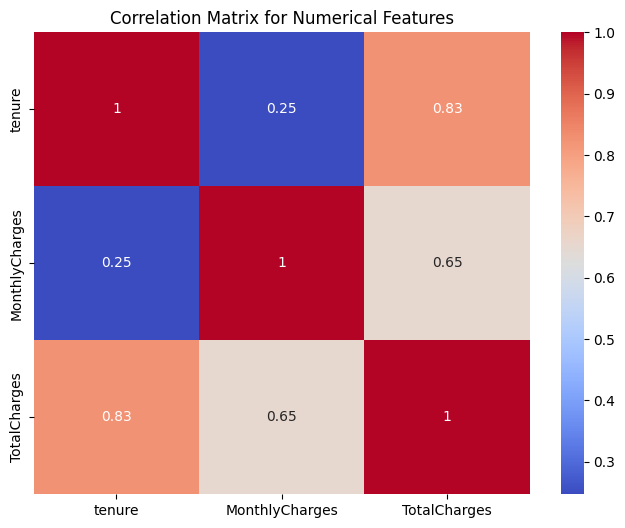

In [ ]:
# Selecting numerical columns for correlation matrix
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Correlation matrix
#
# Convert TotalCharges to numeric, forcing invalid parsing to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
corr_matrix = df[numerical_features].corr()
# Now, check again for missing values in the dataset
print(df.isnull().sum())


# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Numerical Features')
plt.show()


tenure vs TotalCharges: Strong positive correlation (0.83), indicating that customers with longer tenures tend to have higher total charges.

tenure vs MonthlyCharges: Weak correlation (0.25), suggesting that monthly charges don't significantly increase with tenure.

MonthlyCharges vs TotalCharges: Moderate positive correlation (0.65), meaning higher monthly charges generally lead to higher total charges.

In summary, TotalCharges strongly correlates with both tenure and MonthlyCharges, while tenure and MonthlyCharges have a weaker relationship.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


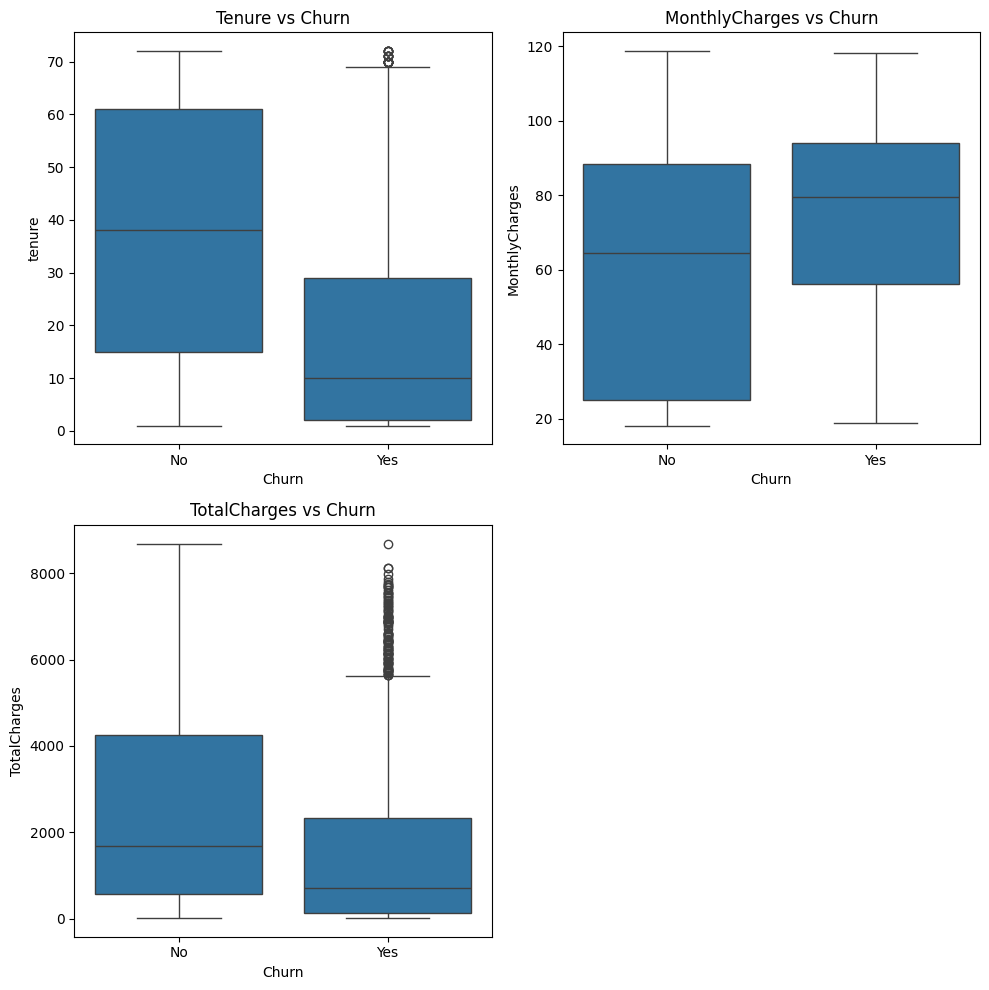

In [ ]:
# Plotting boxplots for tenure, MonthlyCharges and TotalCharges against Churn
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Tenure vs Churn')

plt.subplot(2, 2, 2)
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('MonthlyCharges vs Churn')

plt.subplot(2, 2, 3)
sns.boxplot(x='Churn', y='TotalCharges', data=df)
plt.title('TotalCharges vs Churn')


plt.tight_layout()
plt.show()


Tenure vs Churn: Customers who did not churn generally have much higher tenures, with a median around 50 months. Customers who churned tend to have significantly lower tenures, with a median under 10 months. This suggests that long-term customers are less likely to churn.

MonthlyCharges vs Churn: Customers who churn tend to have slightly higher monthly charges compared to those who did not churn, although the difference is not as pronounced as tenure.

TotalCharges vs Churn: Non-churning customers tend to have higher total charges due to longer tenures, while churned customers have lower total charges with some outliers, indicating a pattern of shorter service duration before churning.

In summary, tenure seems to be the most significant factor associated with churn, while monthly and total charges also show some differentiation between churned and non-churned customers.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

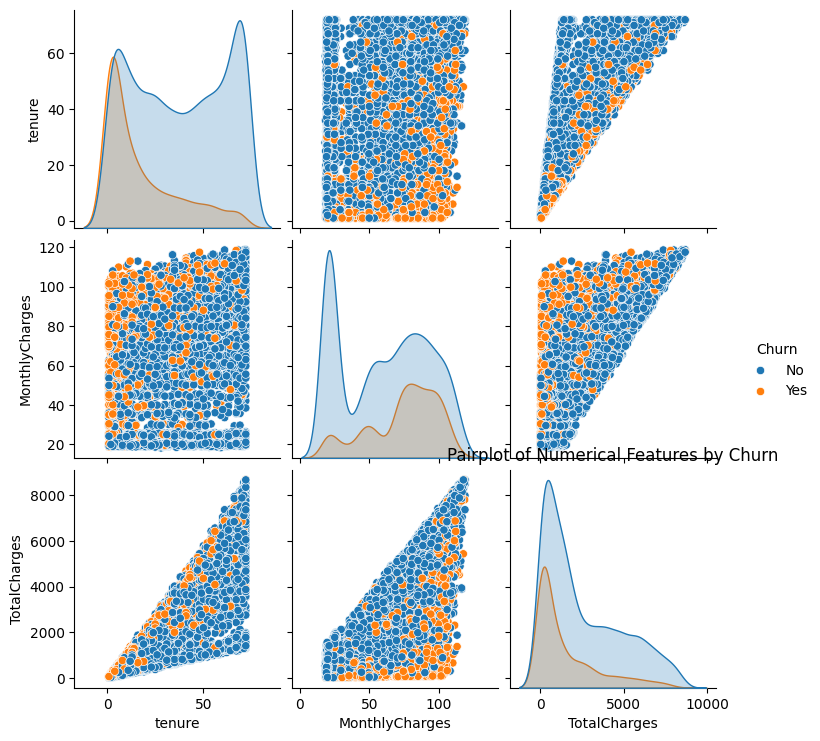

In [ ]:
# Scatter plot to check for linear relationships
sns.pairplot(df, vars=numerical_features, hue='Churn')
plt.title('Pairplot of Numerical Features by Churn')
plt.show()


Linear regression assumptions are not well-supported, as the relationships are not linear, particularly for tenure and TotalCharges.

Logistic regression can manage the binary nature of Churn, but the relationships are not perfectly linear in log-odds terms, so it may struggle with fitting tenure and TotalCharges well.

GAM is the most flexible model and can handle the clear non-linear relationships observed between features like tenure and churn, making it the best-suited model for capturing these patterns.


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

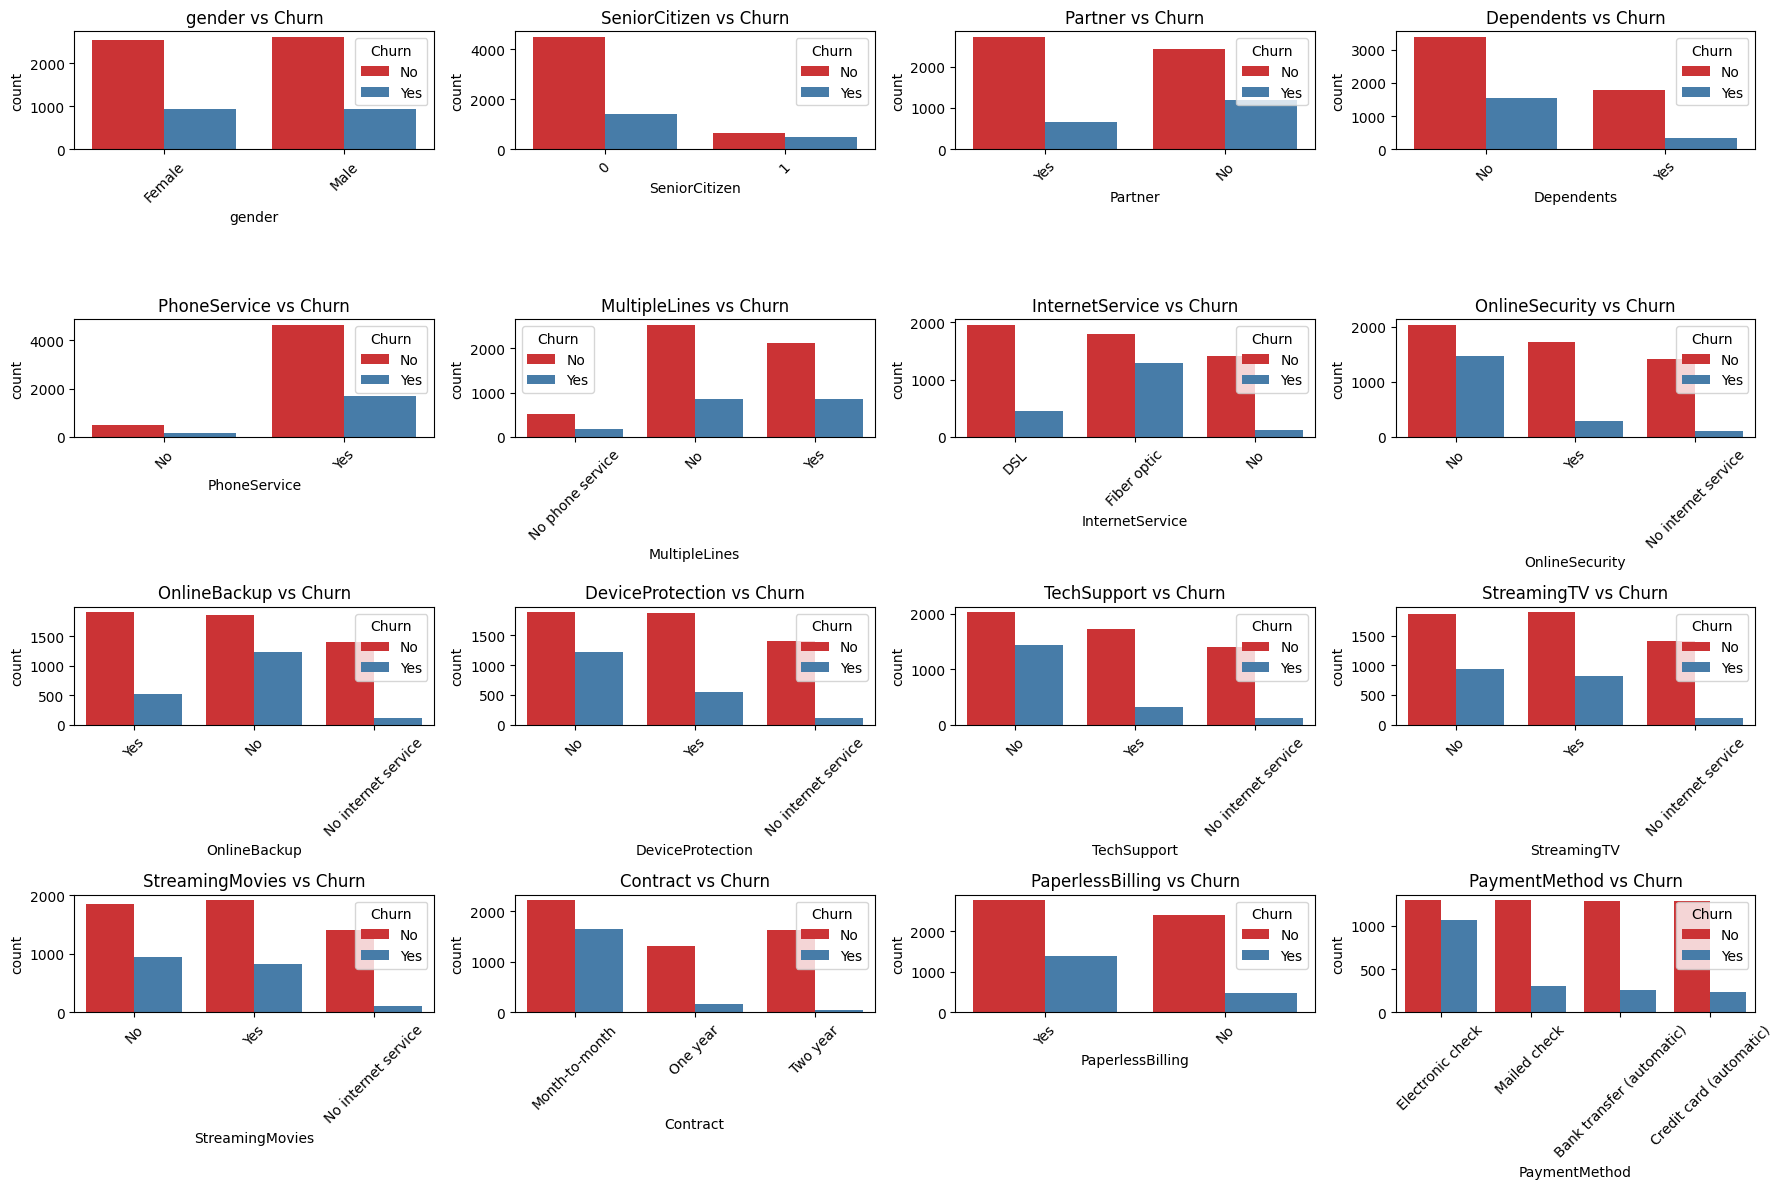

In [ ]:
# Set up the figure for subplots
plt.figure(figsize=(18, 12))

# Create a list of categorical columns to visualize
categorical_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
                       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                       'Contract', 'PaperlessBilling', 'PaymentMethod']

# Create subplots for each categorical variable against Churn
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(4, 4, i)
    sns.countplot(x=col, hue='Churn', data=df, palette='Set1')
    plt.title(f'{col} vs Churn')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


This series of count plots visualizes the relationship between various categorical features and the target variable `Churn`. Here’s an analysis based on the observed trends:

### Key Observations:

1. **Gender vs Churn**:
   - The distribution of churn seems relatively balanced between males and females. Gender does not appear to be a significant indicator of churn.

2. **SeniorCitizen vs Churn**:
   - Senior citizens (category `1`) have a higher churn rate compared to non-senior citizens. Being a senior may be a factor influencing churn.

3. **Partner vs Churn**:
   - Customers without partners tend to churn more frequently. This suggests that customers with partners may have higher loyalty or are less likely to churn.

4. **Dependents vs Churn**:
   - Customers with dependents churn less often than those without dependents, indicating that having dependents could be associated with longer customer tenure and less churn.

5. **PhoneService vs Churn**:
   - The churn rate is much lower among customers without phone service. For customers with phone service, the churn rate is more balanced.

6. **MultipleLines vs Churn**:
   - Customers who have "No phone service" rarely churn, while those with multiple lines (`Yes`) seem to churn at higher rates compared to those with only one line (`No`).

7. **InternetService vs Churn**:
   - Fiber optic customers churn significantly more than DSL customers. This could indicate dissatisfaction or competition in the fiber optic segment.

8. **OnlineSecurity vs Churn**:
   - Customers without online security services are more likely to churn, while those with online security have lower churn rates.

9. **OnlineBackup vs Churn**:
   - The pattern here is similar to online security: customers with no online backup service are more likely to churn than those who have it.

10. **DeviceProtection vs Churn**:
    - The churn rate is higher for customers without device protection. Device protection seems to be a factor associated with customer retention.

11. **TechSupport vs Churn**:
    - Customers without tech support services churn more frequently. Offering tech support may contribute to customer retention.

12. **StreamingTV and StreamingMovies vs Churn**:
    - The churn rate is higher for customers without streaming services. It could indicate that customers with more bundled services (such as TV and movies) are more likely to stay.

13. **Contract vs Churn**:
    - Customers on a month-to-month contract churn significantly more than those on one- or two-year contracts. Long-term contracts appear to reduce churn.

14. **PaperlessBilling vs Churn**:
    - Customers with paperless billing tend to churn more than those with traditional billing. This may suggest that paperless billing correlates with more transient customers.

15. **PaymentMethod vs Churn**:
    - Customers using electronic checks have the highest churn rate, while those using bank transfers or credit cards churn less. Payment methods may be indicative of churn tendencies.

### Model Implications:
- **Linear Regression**: Many of these relationships do not seem linear. For example, the churn distribution by `Contract` is distinctly non-linear, making it unsuitable for linear regression.
  
- **Logistic Regression**: Many features, such as `Contract` and `PaymentMethod`, show strong distinctions between churn categories, suggesting that logistic regression could perform well in separating customers based on these features.

- **GAM (Generalized Additive Model)**: The non-linear relationships between churn and features like `InternetService`, `TechSupport`, and `Contract` would be well-handled by GAM. The model could capture more complex, non-linear effects that logistic or linear regression might miss.

### Conclusion:
Features like `Contract`, `InternetService`, and `PaymentMethod` have the strongest relationships with churn and should be prioritized for modeling. Logistic regression could work well given the clear categorical separations, but GAM would likely provide the most flexibility to capture more complex, non-linear relationships.

(Analysis primaryly given by ChatGPT, edited by Wayne)

## Logistic Regression ##

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Remove 'customerID' as it is not useful for prediction
df_logistic = df.drop(columns=['customerID'])
df_logistic.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:


# Separate the features and target variable
X = df_logistic.drop(columns=['Churn'])
y = df_logistic['Churn']

# Identify categorical columns for one-hot encoding
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()

# Identify numerical columns (columns that should pass through without encoding)
numerical_columns = X.select_dtypes(exclude=['object']).columns.tolist()

# Create a preprocessing pipeline for one-hot encoding categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical_columns)
    ], remainder='passthrough')  # Ensure numerical features are passed through unchanged

# Set up the logistic regression pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression())
])

# Split the data into training and test sets (for larger datasets, not necessary with 3 rows)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Train the model
model_pipeline.fit(X_train, y_train)

# Extract the LogisticRegression model from the pipeline
log_reg = model_pipeline.named_steps['model']

# Get the feature names after preprocessing (OneHotEncoder creates new feature names)
encoded_columns = model_pipeline.named_steps['preprocessor'].transformers_[0][1].get_feature_names_out(categorical_columns)
feature_names = list(encoded_columns) + numerical_columns  # Combine encoded and numerical features
print("input features:")
print(X.head(0))
# Display the coefficients
coefficients_log = pd.DataFrame(log_reg.coef_.flatten(), index=feature_names, columns=['Coefficient'])
#print(coefficients_log)

# Optional: Evaluate the model
y_pred = model_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='Yes')
recall = recall_score(y_test, y_pred, pos_label='Yes')
f1 = f1_score(y_test, y_pred, pos_label='Yes')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


input features:
Empty DataFrame
Columns: [gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges]
Index: []
Accuracy: 0.8006257110352674
Precision: 0.6583442838370565
Recall: 0.5318471337579618
F1 Score: 0.5883734586024663


### PDP ###

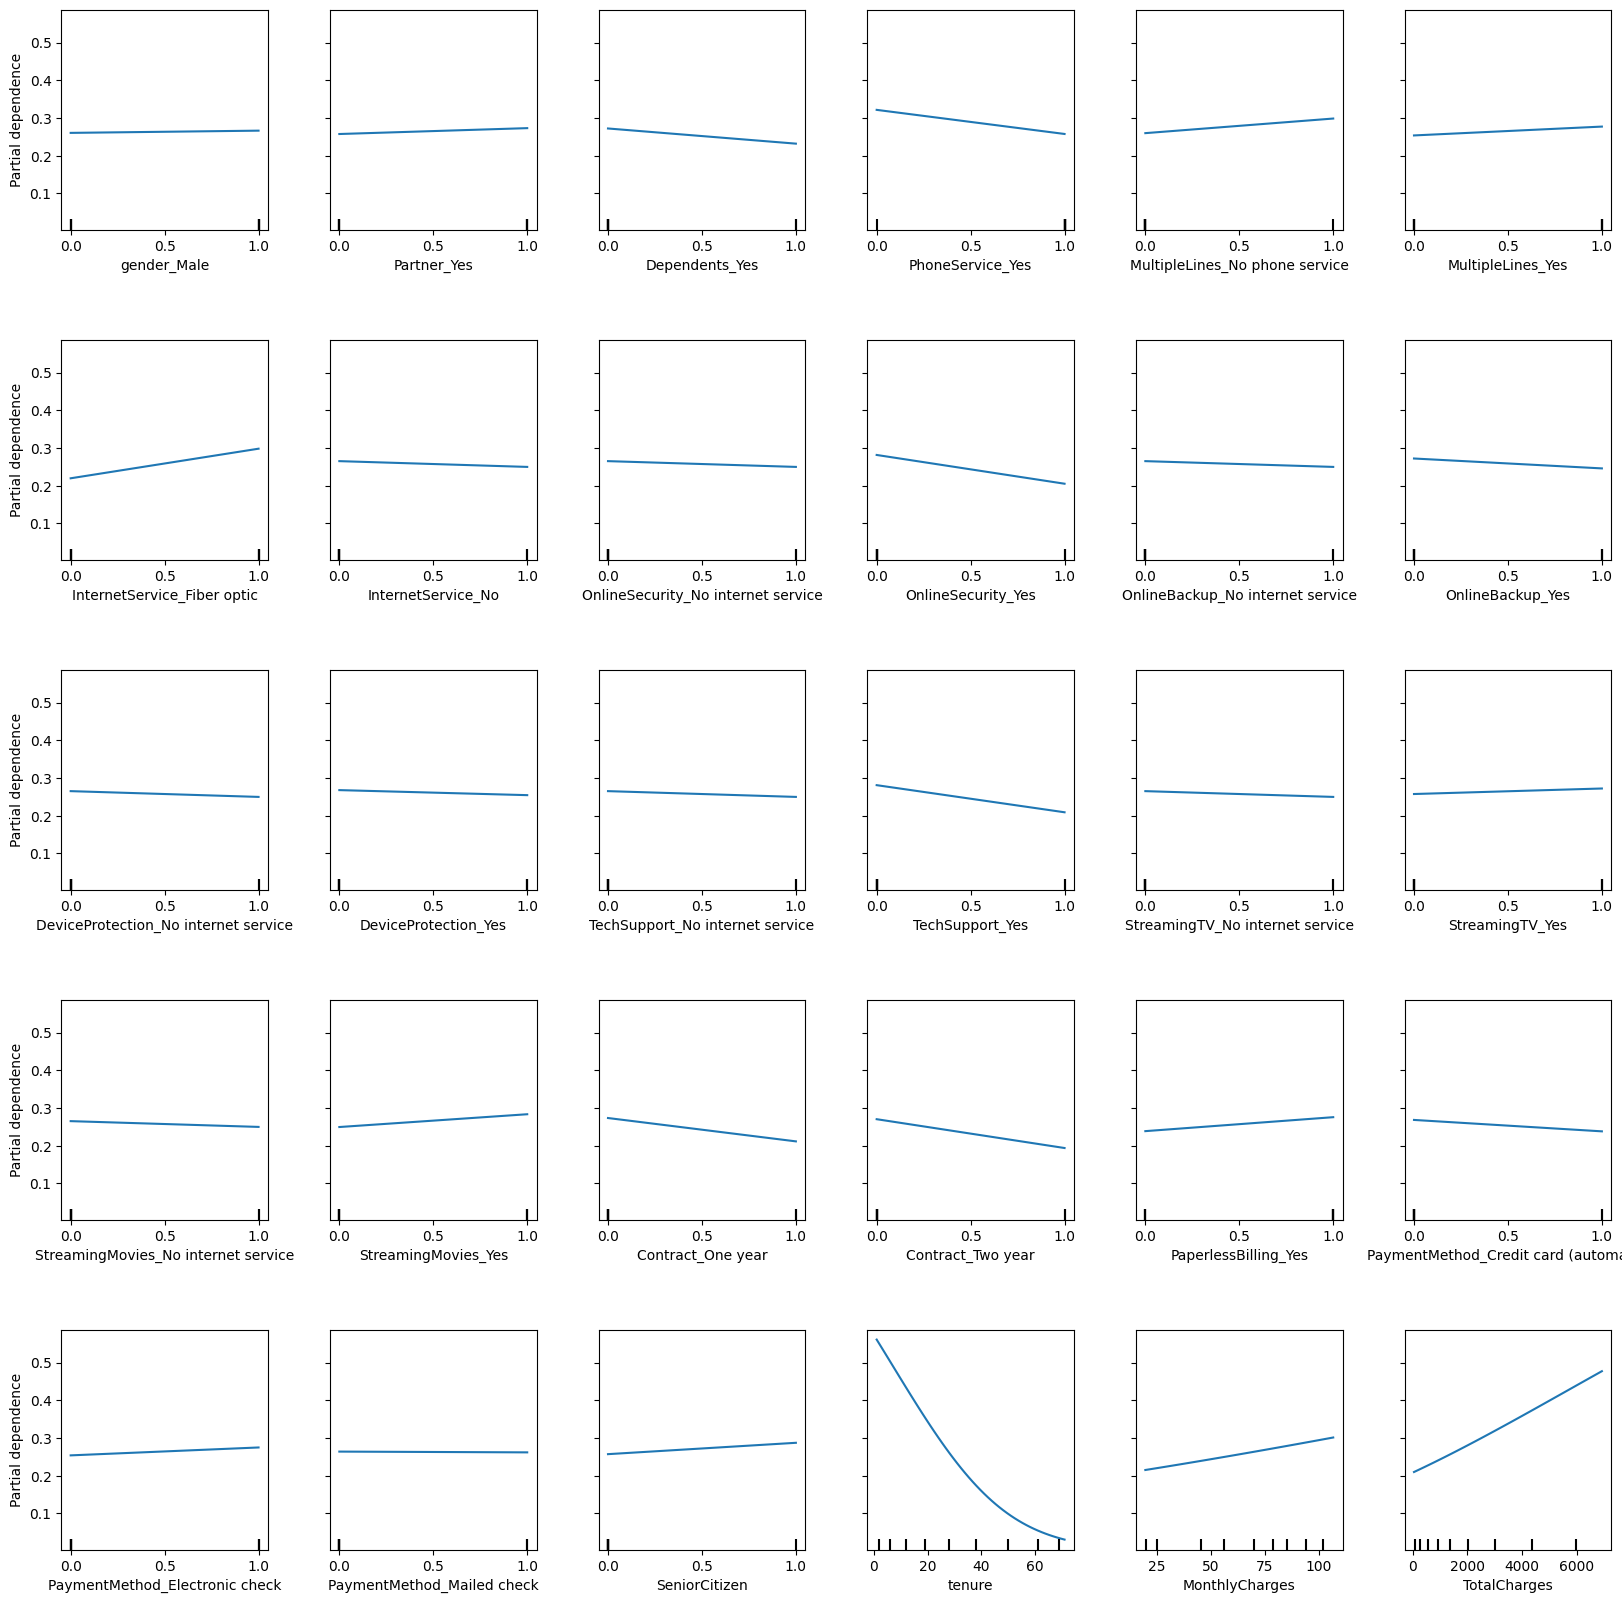

In [ ]:
# Transform X_train to get preprocessed features (required for PDP plotting)
X_train_transformed = model_pipeline.named_steps['preprocessor'].transform(X_train)

# Extract the feature names after preprocessing (OneHotEncoder creates new feature names)
encoded_columns = model_pipeline.named_steps['preprocessor'].transformers_[0][1].get_feature_names_out(categorical_columns)
feature_names = list(encoded_columns) + numerical_columns  # Combine encoded and numerical features

# Plot PDP for selected features
selected_features = list(range(len(feature_names)))  # Use all feature indices

display_PDP = PartialDependenceDisplay.from_estimator(
    model_pipeline.named_steps['model'],
    X_train_transformed,
    features=selected_features,
    feature_names=feature_names,
    grid_resolution=50,
    n_cols=6
)

# get figure
display_PDP.figure_.set_size_inches(20, 20)
display_PDP.figure_.subplots_adjust(hspace=0.5, wspace=0.3)  # change the space between subpolts

plt.show()  # show plot

Partial Dependence Plot (PDP)

Explanation of this PDP:
X-axis : This axis shows the feature values, which in this case are 0 and 1, or continuous values.
Y-axis (Partial Dependence): This shows the model's predicted outcome (or average prediction) as a function of the X feature.


1. Binary/Categorical Features (e.g., Gender, Partner, Internet Service, etc.):

The majority of the categorical variables, such as gender_Male, Partner_Yes, PhoneService_Yes, and various InternetService types, exhibit relatively flat curves. This indicates that these features have minimal influence on the predicted outcome for this particular model. Changes in these features don’t significantly alter the model’s predictions.

However, features like MultipleLines_Yes, OnlineSecurity_Yes, DeviceProtection_Yes, and Contract_Two year show slight positive trends. This suggests that having multiple lines, online security, device protection, and a two-year contract may have a modest positive impact on the predicted outcome.

2. Contract Types:

For Contract_One year and Contract_Two year, a slight positive trend is observed, implying that longer contract terms may decrease the likelihood of churn or improve customer retention in this context.

3. Numerical Features (e.g., Tenure, MonthlyCharges, TotalCharges):

Tenure shows a strong negative relationship, which is common in customer churn models. As tenure increases, the likelihood of churn decreases significantly, indicating that long-term customers are less likely to churn.
MonthlyCharges has a slight upward trend, indicating that higher monthly charges may slightly increase the likelihood of churn.
TotalCharges shows a non-linear curve. Initially, there is a sharp decrease in the likelihood of churn with lower total charges, which flattens out after a certain point. This suggests that customers with higher total charges are less likely to churn.

4. Senior Citizen:

The feature SeniorCitizen shows a slight upward trend, implying that senior citizens may have a slightly higher likelihood of churn in this dataset.

### ICE ###

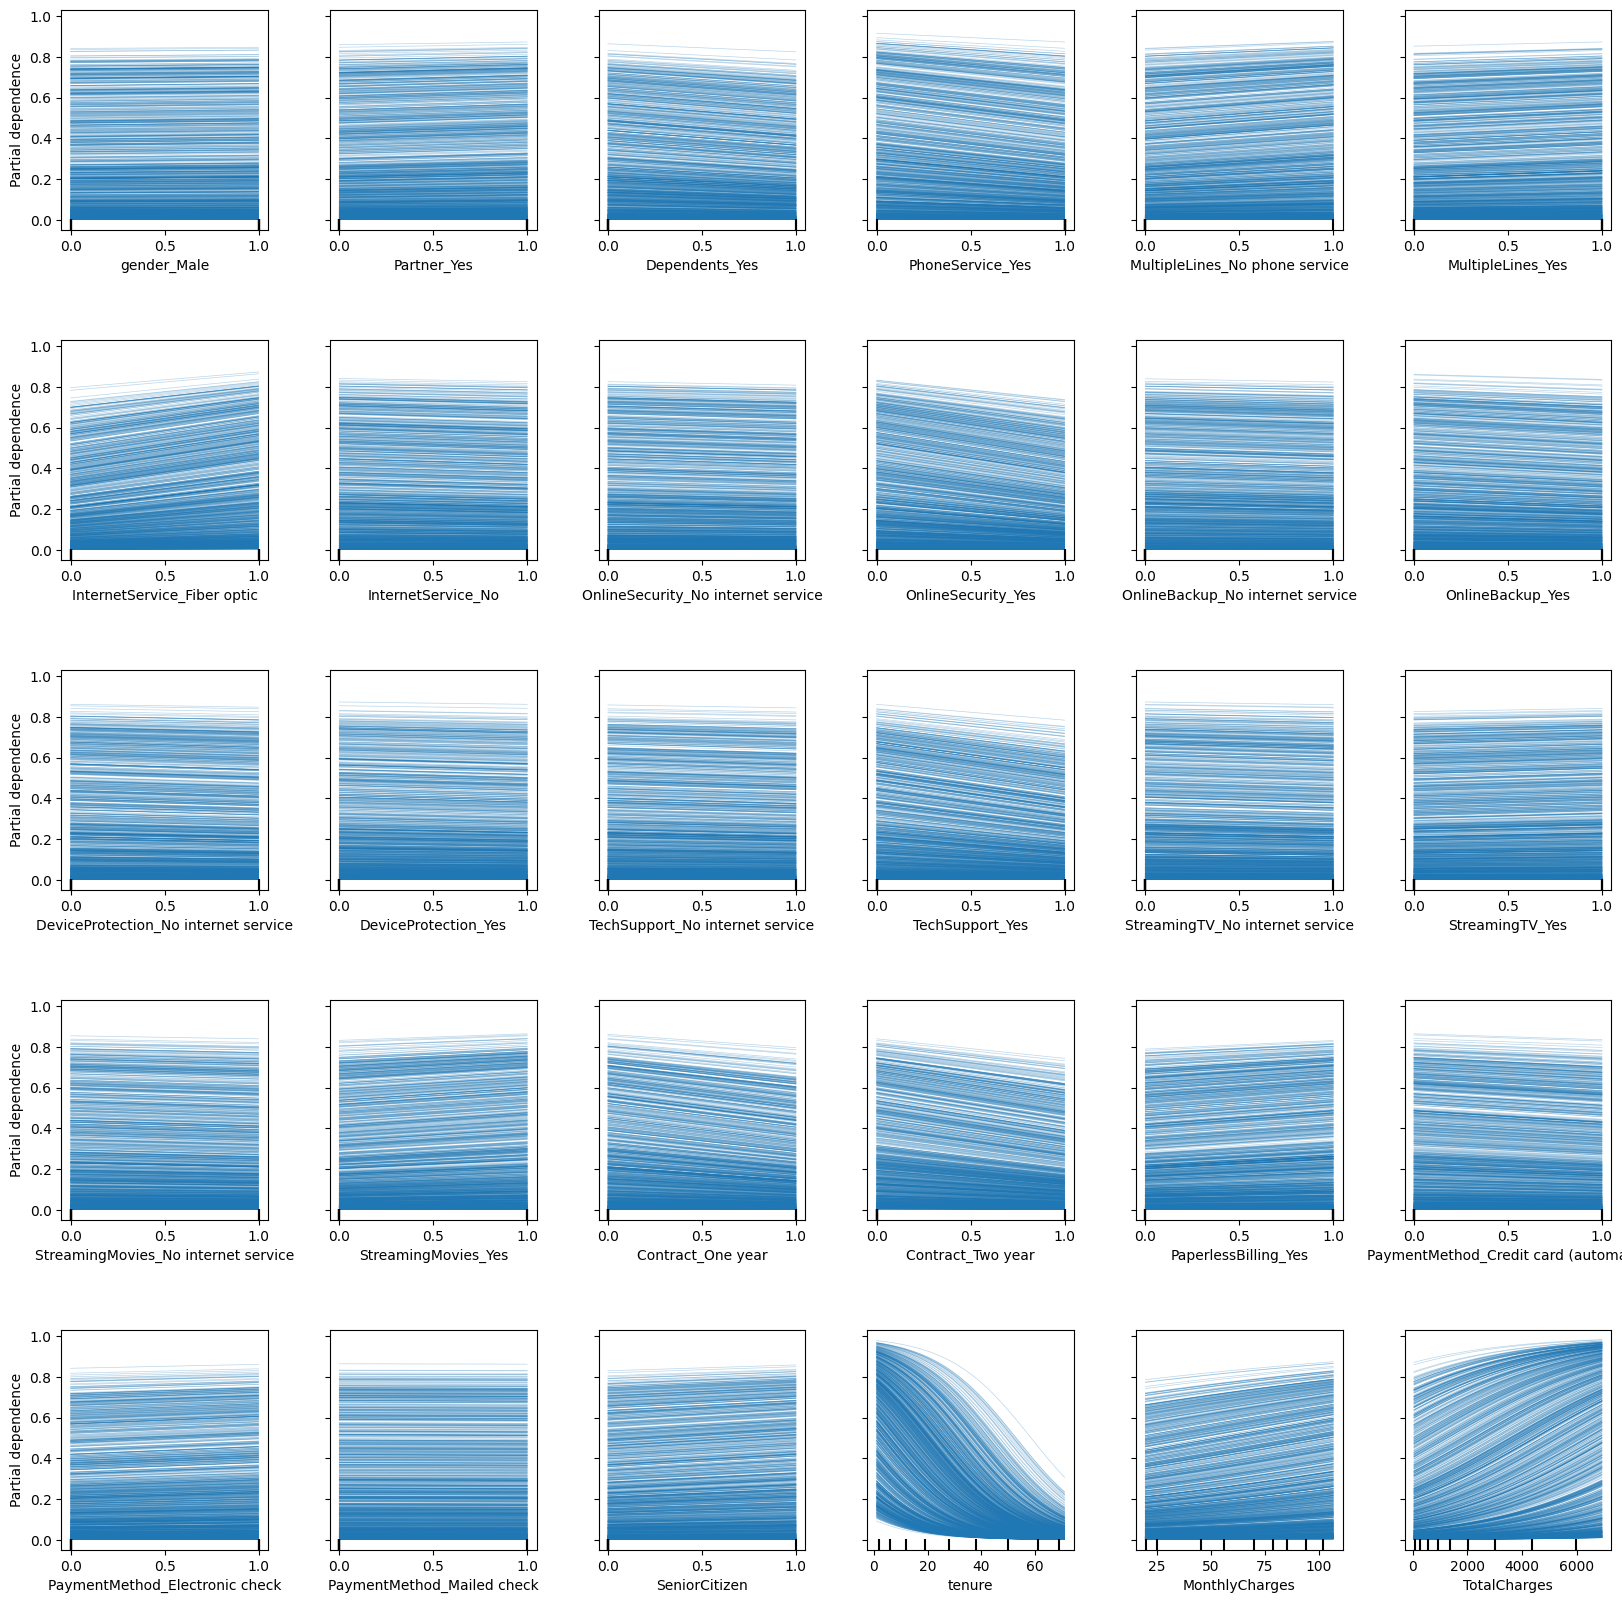

In [ ]:
# Generate ICE plots (kind='individual' for ICE lines)
display_ICE = PartialDependenceDisplay.from_estimator(
    model_pipeline.named_steps['model'],
    X_train_transformed,
    features=selected_features,
    feature_names=feature_names,
    grid_resolution=50,
    n_cols=6,
    kind="individual"  # Set kind to 'individual' for ICE plots
)

# Get figure object and adjust size and spacing
display_ICE.figure_.set_size_inches(20, 20)  # Adjust chart size
display_ICE.figure_.subplots_adjust(hspace=0.5, wspace=0.3)  # Adjust subplot spacing

plt.show()  # Show the chart

Individual Conditional Expectation (ICE)

Explanation of the ICE Plot:
X-axis: This axis shows the feature values, which in this case are 0 and 1, or continuous values.

Y-axis (Partial Dependence): This shows the predicted outcome for each individual data point, conditioned on the feature X.

1. Binary/Categorical Features (e.g., Gender, Partner, Phone Service, etc.):

The majority of the categorical variables, such as gender_Male, Partner_Yes, Dependents_Yes, and PhoneService_Yes, exhibit relatively flat curves. This indicates that these features have minimal influence on the predicted outcome for this particular model. Changes in these features don’t significantly alter the model’s predictions.

However, some features like MultipleLines_Yes, OnlineSecurity_Yes, DeviceProtection_Yes, and TechSupport_Yes show slight positive trends. This suggests that having multiple lines, online security, device protection, and technical support may have a modest positive impact on the predicted outcome, likely decreasing the likelihood of churn for customers who use these services.

2. Contract Types:

For Contract_One year and Contract_Two year, a slight positive trend is observed in the individual lines. This indicates that longer contract terms may reduce the likelihood of churn or improve customer retention. In particular, the Contract_Two year feature shows a more pronounced positive impact, suggesting that customers with a two-year contract are less likely to churn compared to those with a shorter contract.

3. Numerical Features (e.g., Tenure, MonthlyCharges, TotalCharges):

Tenure shows a strong negative relationship with churn, as most ICE lines exhibit a sharp downward slope. As tenure increases, the likelihood of churn decreases significantly, implying that customers who have been with the service for a longer time are less likely to leave. This effect is consistent across the majority of individual predictions.

MonthlyCharges shows a slight upward trend, indicating that higher monthly charges may slightly increase the likelihood of churn. This pattern is observed across most individuals, although the overall effect is not as strong as tenure.

TotalCharges demonstrates a more complex relationship. Initially, there is a sharp decrease in the likelihood of churn for customers with lower total charges, but this effect flattens out after a certain threshold. This suggests that customers with higher total charges are generally less likely to churn, though the effect diminishes as the charges increase.

4. Senior Citizen:

The SeniorCitizen feature shows a slight upward trend in the ICE lines, indicating that senior citizens may have a slightly higher likelihood of churn in this dataset. This effect, while not dramatic, suggests that age could be a factor that modestly influences customer churn behavior.

### ALE ###

In [ ]:
len(selected_features)

30

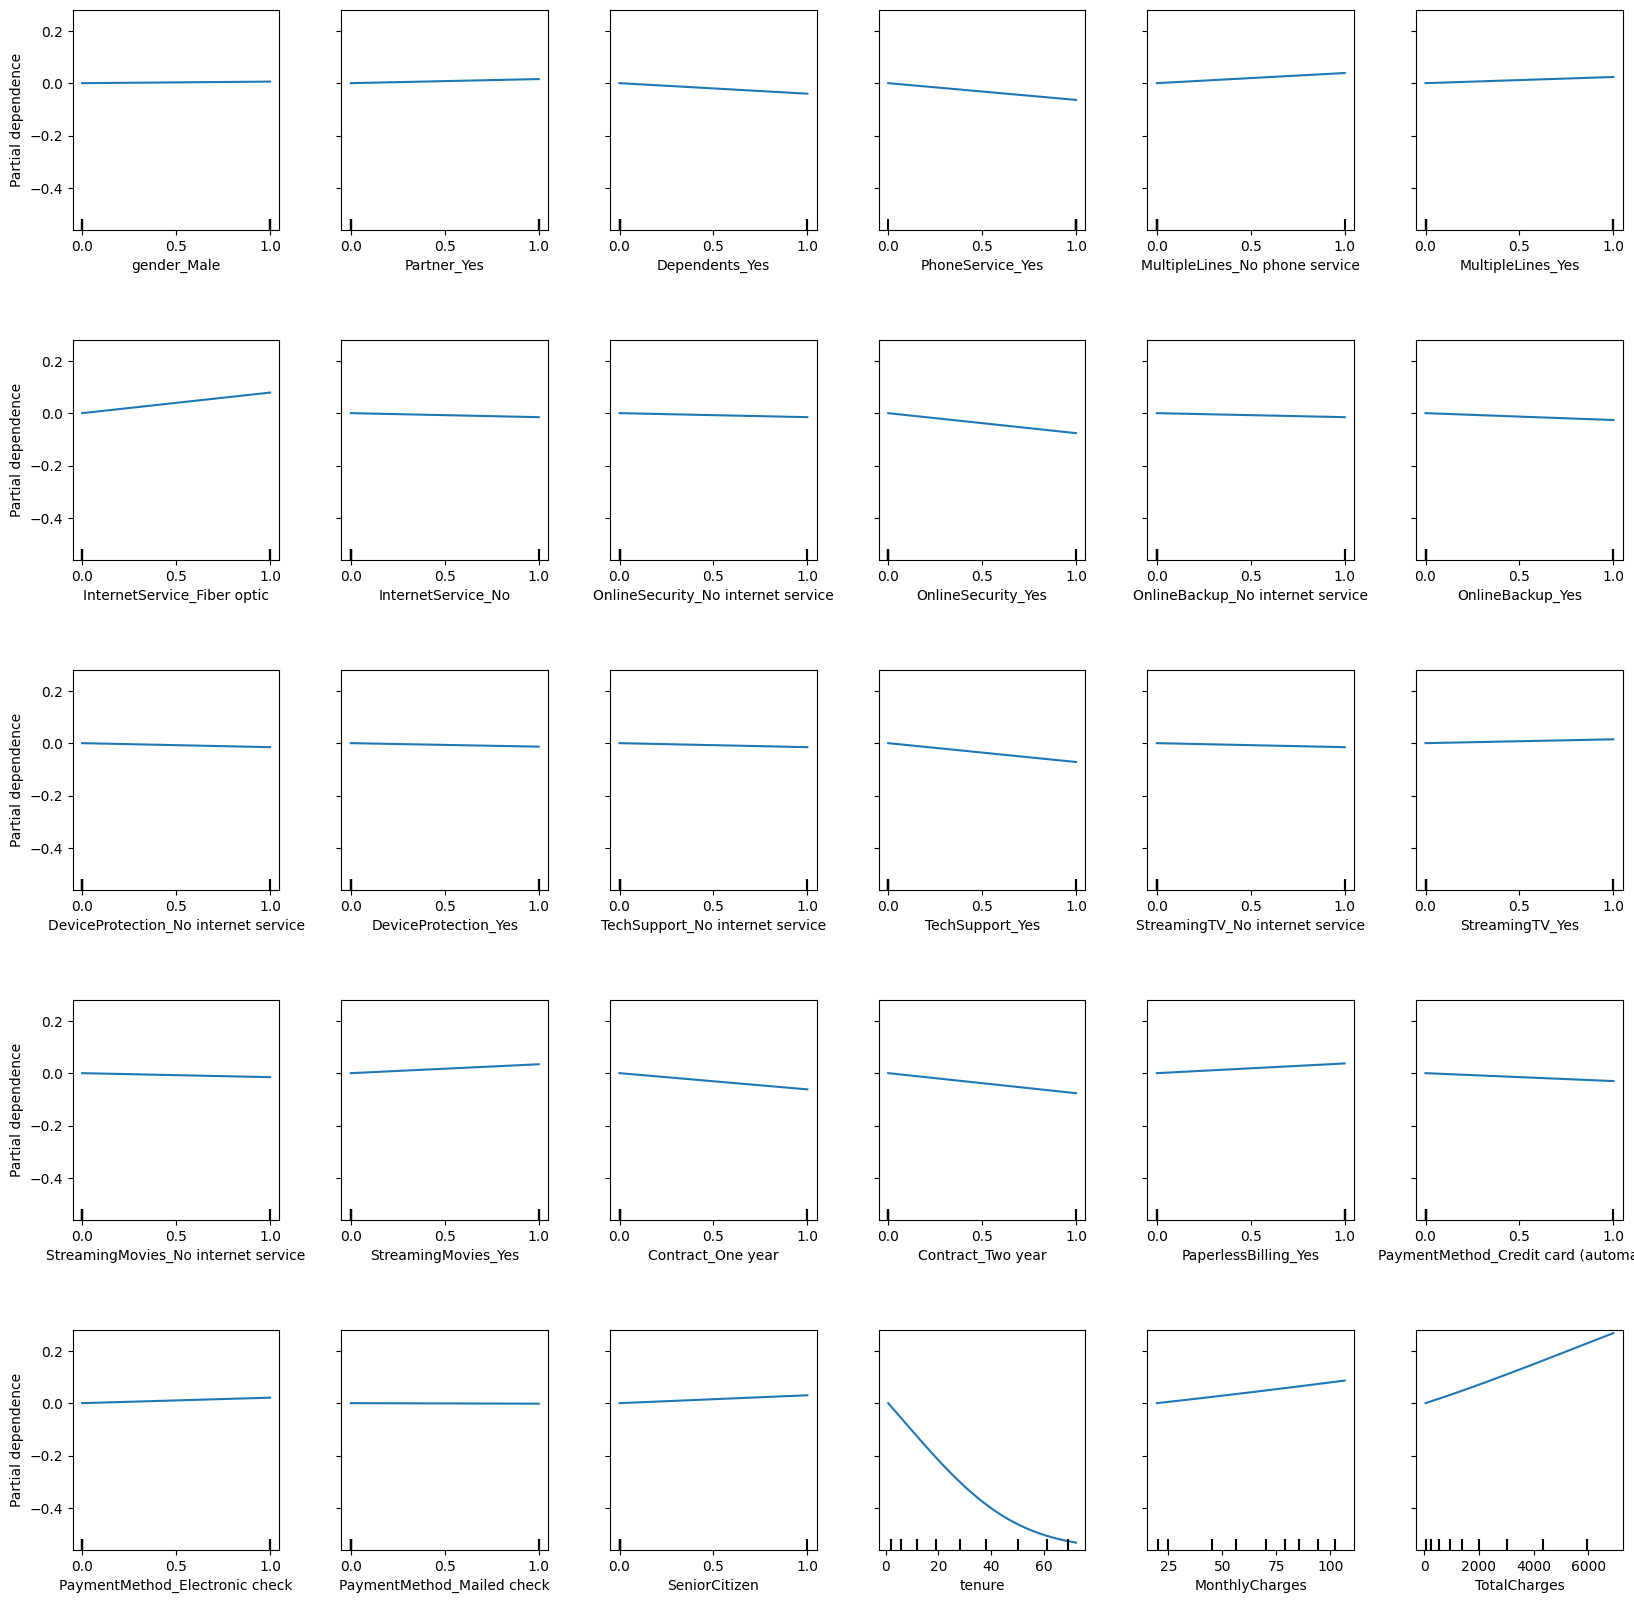

In [ ]:
#fig, axes = plt.subplots(1, len(selected_features), figsize=(len(selected_features) * 6, 6))
display_ALE = PartialDependenceDisplay.from_estimator(
    model_pipeline.named_steps['model'],
    X_train_transformed,
    features=selected_features,
    feature_names=feature_names, # use all features
    kind="average",
    centered=True,
    #ax=axes,
    n_cols=6,
    #n_jobs=-1
)

# Get figure object and adjust size and spacing
display_ALE.figure_.set_size_inches(20, 20)  # Adjust chart size
display_ALE.figure_.subplots_adjust(hspace=0.5, wspace=0.3)  # Adjust subplot spacing

plt.show()  # Show the chart

Accumulated Local Effects (ALE)

X-axis: This axis represents the feature values, which can be binary (0 and 1) or continuous.

Y-axis (Partial Dependence): This shows the average effect that a feature has on the model’s prediction. Unlike partial dependence plots, ALE plots measure local changes in the prediction, rather than global averages, ensuring that they account for feature interactions more effectively.


1. Binary/Categorical Features:

Most categorical variables, like gender_Male, Partner_Yes, and PhoneService_Yes, show flat curves, indicating minimal impact on churn predictions. However, features such as MultipleLines_Yes, OnlineSecurity_Yes, and TechSupport_Yes show slight positive trends, suggesting these services may slightly reduce churn.

2. Contract Types:

Both Contract_One year and Contract_Two year show positive trends, with longer contracts, especially two-year terms, decreasing churn likelihood.

3. Numerical Features:

Tenure has a strong negative effect on churn, with longer tenure significantly reducing the likelihood of leaving.
MonthlyCharges shows a mild upward trend, indicating higher charges slightly increase churn.
TotalCharges starts with a sharp decrease in churn for lower values but flattens as charges increase.

4. Senior Citizen:

The SeniorCitizen feature shows a slight upward trend, suggesting a modest increase in churn likelihood for older customers.